<a href="https://colab.research.google.com/github/DavidCoy77/quantum_programming/blob/main/lab_11sep2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('testing testing 123')
print('new test 12039')

a = 5
b = 7
print(f'a,b = {a},{b}')
print(a,b)

a,b = b,a
print(a,b)

print(f'a,b = {a},{b}')
if a > b :
    c = a + b
    d = a - b
    print(c,d)
else:
    x = a * b
    y = a / b
    print(x,y)

testing testing 123
new test 12039
a,b = 5,7
5 7
7 5
a,b = 7,5
12 2


In [2]:
#1. Installing libraries
# pip install matplotlib
# pip install pylatexenc
# pip install "qiskit[visualization]" 
# pip install qiskit-ibm-runtime
# pip install qiskit-aer
#2. Importing libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_aer import AerSimulator


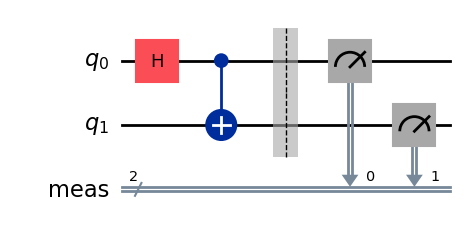

In [3]:
#3. Creating a quantum circuit & drawing
# qc = QuantumCircuit(2)  # quantum circtuit with 2 qubits
# qc.h(0)  # h gate on qubit 0 
# qc.measure_all()  # measure all 
# qc.draw(output="mpl")  # draw circuit with matplotlib
# with this circuit, it's about 50/50 00 and 01 

qc = QuantumCircuit(2)  # 2 qubit circuit 
qc.h(0)  # h gate on q0 (q0 50/50, q1 is 1)
qc.cx(0, 1)  # CNOT on q0 & q1. q0 is the control bit, q1 is the target bit 
qc.measure_all()
qc.draw(output="mpl")  # draw circuit with matplotlib
# with this circuit, 50/50 00 and 11 
# qubits start the circuit in state 0 


In [4]:
#4. Initializing backend (Aer Simulator)
backend = AerSimulator()
print(backend)

AerSimulator('aer_simulator')


In [5]:
#5. Executing the quantum circuit
sampler = Sampler(mode=backend)  # make sampler, use AER simulator for backend
pub = (qc,)  # (,) are there bc IBM says so 
job = sampler.run([qc], shots=int(1e4))  # [pub] has [] because IBM says so 
# 1e4 = 1 x 10^4 = 10,000


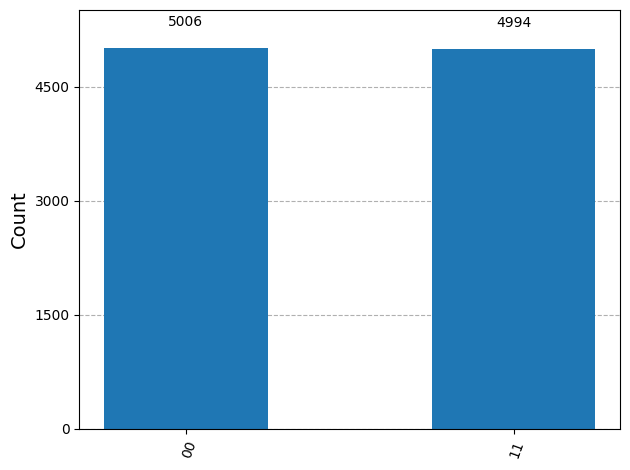

In [6]:
#6. Plotting results
counts_int = job.result()[0].data.meas.get_int_counts()
counts_bin = job.result()[0].data.meas.get_counts()
plot_histogram(counts_bin)